# Creating networks, 
# Obtaining information about them,
# Calculating centralities

In [1]:
# Import requirement libraries
import matplotlib.pyplot as plt
import networkx as nx
from igraph import *
import igraph
import collections
import pandas as pd
import numpy as np
import scipy.stats

In [2]:
# read data
df_B = pd.read_excel("W.Breast_edges_filtered.xlsx")
df_C = pd.read_excel("W.Colon_edges_filtered.xlsx")
df_L = pd.read_csv("WLUSC.csv")

df_L.head(10)

,Target,Source,p
0,ABL1,SHC3,0.8
1,ABL1,STAT5B,0.8
2,ABL1,CBLB,0.8
3,ABL1,CBLC,0.8
4,ABL1,CD55,0.8
5,ABL1,CRK,0.8
6,ABL1,CRKL,0.8
7,ABL1,RAC3,0.8
8,ABL1,RB1,0.8
9,ABL1,SHC1,0.8


# About networks:

In [3]:
# Create the directed and weighted graph using Source and Target for connections.
G_B = nx.from_pandas_edgelist(df_B, 'Source', 'Target', edge_attr='p', create_using=nx.DiGraph())
G_C = nx.from_pandas_edgelist(df_C, 'Source', 'Target', edge_attr='p', create_using=nx.DiGraph())
G_L = nx.from_pandas_edgelist(df_L, 'Source', 'Target', edge_attr='p', create_using=nx.DiGraph())

# Info of network
print('Breast Cancer Network:')
print(nx.info(G_B))
G_B.is_directed()
print('\n')
print('Colon Cancer Network:')
print(nx.info(G_C))
G_C.is_directed()
print('\n')
print('Lung Cancer Network:')
print(nx.info(G_L))
G_L.is_directed()

Breast Cancer Network:
Name: 
Type: DiGraph
Number of nodes: 10883
Number of edges: 86381
Average in degree:   7.9372
Average out degree:   7.9372


Colon Cancer Network:
Name: 
Type: DiGraph
Number of nodes: 15665
Number of edges: 117898
Average in degree:   7.5262
Average out degree:   7.5262


Lung Cancer Network:
Name: 
Type: DiGraph
Number of nodes: 11016
Number of edges: 87388
Average in degree:   7.9328
Average out degree:   7.9328


True

In [4]:
# Check connected or disconnected network --> directed--> Strongly/Weakly connectivity.
print('Is Breast Cancer Network strongly connected?', nx.is_strongly_connected(G_B))
print('Is Breast Cancer Network weakly connected?', nx.is_weakly_connected(G_B))
print('Is Colon Cancer Network strongly connected?', nx.is_strongly_connected(G_C))
print('Is Colon Cancer Network weakly connected?', nx.is_weakly_connected(G_C))
print('Is Lung Cancer Network strongly connected?', nx.is_strongly_connected(G_L))
print('Is Lung Cancer Network weakly connected?', nx.is_weakly_connected(G_L))
print('\n')

#Returns number of strongly connected components in graph.
print('The number strongly connected components in Breast Cancer Network:', nx.number_strongly_connected_components(G_B))
print('The number strongly connected components in Colon Cancer Network:', nx.number_strongly_connected_components(G_C))
print('The number strongly connected components in Lung Cancer Network:', nx.number_strongly_connected_components(G_L))
#Returns the number of weakly connected components in graph.
print('The number weakly connected components in Breast Cancer Network:', nx.number_weakly_connected_components(G_B))
print('The number weakly connected components in Colon Cancer Network:', nx.number_weakly_connected_components(G_C))
print('The number weakly connected components in Lung Cancer Network:', nx.number_weakly_connected_components(G_L))

Is Breast Cancer Network strongly connected? False
Is Breast Cancer Network weakly connected? False
Is Colon Cancer Network strongly connected? False
Is Colon Cancer Network weakly connected? False
Is Lung Cancer Network strongly connected? False
Is Lung Cancer Network weakly connected? False


The number strongly connected components in Breast Cancer Network: 9870
The number strongly connected components in Colon Cancer Network: 14517
The number strongly connected components in Lung Cancer Network: 9997
The number weakly connected components in Breast Cancer Network: 2
The number weakly connected components in Colon Cancer Network: 2
The number weakly connected components in Lung Cancer Network: 2


In [5]:
# Generate connected components and select the largest:
largest_component_B = max(nx.weakly_connected_components(G_B), key=len)
largest_component_C = max(nx.weakly_connected_components(G_C), key=len)
largest_component_L = max(nx.weakly_connected_components(G_L), key=len)

Gconnected_B = G_B.subgraph(largest_component_B)
print('Breast Cancer Network')
print(nx.info(Gconnected_B))
Gconnected_C = G_C.subgraph(largest_component_C)
print('Colon Cancer Network')
print(nx.info(Gconnected_C))
Gconnected_L = G_L.subgraph(largest_component_L)
print('Lung Cancer Network')
print(nx.info(Gconnected_L))

Breast Cancer Network
Name: 
Type: DiGraph
Number of nodes: 10882
Number of edges: 86380
Average in degree:   7.9379
Average out degree:   7.9379
Colon Cancer Network
Name: 
Type: DiGraph
Number of nodes: 15664
Number of edges: 117897
Average in degree:   7.5266
Average out degree:   7.5266
Lung Cancer Network
Name: 
Type: DiGraph
Number of nodes: 11015
Number of edges: 87387
Average in degree:   7.9335
Average out degree:   7.9335


In [6]:
# Get network nodes
nodes_B = list(Gconnected_B.nodes)
print('Breast Cancer Network:')
print(len(nodes_B))
nodes_C = list(Gconnected_C.nodes)
print('Colon Cancer Network:')
print(len(nodes_C))
nodes_L = list(Gconnected_L.nodes)
print('Lung Cancer Network:')
print(len(nodes_L))

Breast Cancer Network:
10882
Colon Cancer Network:
15664
Lung Cancer Network:
11015


In [7]:
# Save them
#pd.DataFrame(nodes_B, columns=['Name']).to_csv("./node_B.csv", sep=',',index=False)
#pd.DataFrame(nodes_C, columns=['Name']).to_csv("./node_C.csv", sep=',',index=False)
#pd.DataFrame(nodes_L, columns=['Name']).to_csv("./node_L.csv", sep=',',index=False)

In [8]:
# Calculate degree
print("Node  Degree")
for v in Gconnected_B:
    print(f"{v:4} {Gconnected_B.degree(v):6}")
    
print("Node  Degree")
for v in Gconnected_C:
    print(f"{v:4} {Gconnected_C.degree(v):6}")
print("Node  Degree")
for v in Gconnected_L:
    print(f"{v:4} {Gconnected_L.degree(v):6}")

Node  Degree
SHC3     20
ABL1    156
STAT5B    204
CBLB     16
CBLC      3
CD55      7
CRK       8
CRKL     14
RAC3      7
RB1     213
SHC1     16
SHC2      5
STAT5A    444
CBL      15
EPHA1      7
EPHA2     10
EPHA3      9
EPHA4      5
EPHA5      2
EPHA7      9
EPHB1      6
EPHB2     10
EPHB3     15
EPHB4      2
EPHB6      7
GRB2     16
MYC    2871
NTRK1     19
NTRK2      4
NTRK3     19
RAC1     10
RAC2      8
APP      14
APBB1     35
TBL1Y      3
APC      43
ARHGEF4      4
AXIN1     13
CTNNB1    199
DVL1     18
DVL2     32
DVL3     14
TBL1XR1     10
TBL1X     32
RPE65      5
AR      409
VEGFA     31
KLK3      7
MAPK3     47
MAPK1     64
HSP90B1     13
HSP90AB1     18
HSP90AA1     32
ABCB1     16
ACAA1      8
ACOX1     12
ACOX2      7
ACPP      7
ACSL1     12
ADAM28      3
ADAMTS3     17
ADIPOQ      8
ADIPOR1      7
ADIPOR2      5
AKR1B1     15
AKT1     40
ALB      11
ALPP      4
ANGPTL4     16
APOA1     13
APOB     11
APOBR     13
APOC3     14
APOE     14
AREG     16
ATP2A2     24
AV

PAX2    290
PAPPA     17
PALB2      7
P2RY4      9
OXTR      6
OPN3      7
OLFML3      7
OLFML1      2
OCA2      3
OAS2      6
NUPR1      5
NUDT4      6
NT5DC3      6
NPTX2     26
NPPA     10
NOL9      5
NIPSNAP1      5
NIP7     10
NEK4      3
NEK2     11
NDUFV1      5
NDUFAB1      6
NDUFA7      4
NDUFA1      6
NDRG4     13
NCL      20
NAIP      3
NAGK      8
MXI1     38
WRAP73     12
WDR76      5
VCP      13
USPL1      9
TRIP12     25
TMX2     11
TAF11     46
SYNE2     14
SUZ12      8
SUGP2     11
SRSF8      6
SMC4     11
SEZ6L2     25
SEPHS1     11
SCN8A     10
RTN4     17
RRM1     11
RFC3      4
RAB40C     10
PRRG3     12
PRKDC     22
PPAT      6
POLE2      8
PEG3     25
PDIA3     12
PDE8A     13
NDUFC1      9
NDC80      6
N4BP2L1     10
N4BP1      6
MUM1      7
MTHFD1      5
MSH2     10
MPPED2     27
MMP15      9
MCM9      5
LPAR2      9
HOXB9     32
HLTF      5
HIVEP1     24
HAT1     11
EXOSC9      8
ERH      12
DUT      11
DOCK9     16
DCTN3     16
DBF4     13
CLIP1      9
CDC45 

GLI1     61
BMP2     14
ASIC2     11
BNC1      4
GLI2     57
GLI3     68
MTSS1      6
NKX2-8     12
PTCH1     28
PTCH2      5
PVR       3
WNT10B     19
WNT11     26
WNT16     11
WNT2     16
WNT2B     32
WNT4     10
WNT5B      3
WNT6     11
WNT7B     11
WNT8B      5
WNT5A     35
CSNK1G1     14
CSNK1G2     15
CSNK1G3      4
BMP8A      4
BMP7      8
BMP5      7
FOXE1      3
SHH      10
HCLS1     22
DNM3      1
DNM2      7
DNM1      7
DNM1L      6
HDAC1    206
HDAC2    107
NEUROG3     14
HHEX     30
HOOK1      5
HK2       7
GBE1      8
GAPDH     29
FAM162A      4
ENO1     17
EDN2     10
CYP2B6      1
CCL16      2
BNIP3      4
B4GALT1     14
ALDOA     23
ALAS2      1
MTOR      6
TUFT1     12
TFF3      4
PPT1      4
PLIN2      4
PFKL      7
PFKFB4      7
PFKFB3     12
PFKFB2      8
PFKFB1      2
P4HTM     11
NR4A1     53
MDK       9
KIF2A      9
KCNA5     10
KCNA4      4
HOOK2     24
HNF4G     14
SLC2A2      3
PKLR     13
IRF3     42
PRPH     13
EMX2      8
HOXA5     37
NCAM1      8
HOXB13  

ID1      40
IRF4     60
MICA      9
MSX1     41
MYOD1     79
NOD2      4
NPY1R      9
OGN       6
PTAFR      3
PTK2B     14
PTPN13      8
RALBP1      7
SERPINA3      4
TACR1      5
TINF2      6
TRADD     27
TRAF3     24
TRAF4     15
TRAF5      4
LTA      11
TRAF1     12
TLR2     11
PPP2R2A     14
PPP2R1A     13
PPP2CB      9
IL1R2      4
IL1R1      3
SDC4     10
CXCL5      6
CXCL3      7
CSF3     15
B2M       9
SELP      1
UBE2D2      5
NKX3-1    128
DLL3     10
NOTCH2     39
ADAM17     12
PSENEN     11
NCSTN      7
LFNG     16
JAG1     14
DTX4      6
DTX3      8
RFNG      4
DTX2     15
APH1A      7
NOTCH3     36
ATP1B2      5
ATP1B3      7
ATP1B4     15
SCNN1A      5
SCNN1B      2
SGK1     19
FXYD2      8
ATP1A3      7
ATP1B1     21
ONECUT1     19
SLC22A6      4
PAX1     11
SLC22A8      6
PDGFRA     11
PAX3     23
KRT12      1
L1CAM      3
PDHX      7
PAX8     25
RXRA    342
KDM5B     18
PAX9      6
NR5A2     19
CUL1     15
IHH       7
HSD17B2      7
OVGP1      1
PAEP      4
BAG1     

USP3     18
USP2     27
UNC93B1      9
UBE4B      7
UBE2B     14
UBA1      9
UBAP2L     17
TNPO2      6
TCOF1     16
TOM1L2      8
TRAPPC8      7
TEF      16
TNFRSF21      5
TMEM222     13
TIMM50      5
TIMM8A     13
TGIF2     22
TESK2      9
TEX10      5
TBC1D5     11
TCERG1     35
TBCEL      9
TAF6L      7
SYBU     17
TATDN2      5
SYNCRIP     21
STXBP2      4
STAG3      8
SNX2      7
SPATA5L1     11
SLC35A5      9
SMNDC1      6
SLC36A1      6
SLC7A2     12
SLC7A5     10
SLC6A15      4
REPIN1     16
SLC33A1      4
SLC31A2      7
SEC23IP      6
SEC24A     15
SIAH2     11
SET      16
SDF4      7
RPS28      9
RREB1    287
RSU1      4
RFX3     16
RPS12      3
RNF219      9
RNF125      3
RNF146      3
RAB21      8
RBBP6     10
RAPGEF3     11
PPP1R3D     12
RAN      14
RAB3IL1      6
RAD1      6
QTRT1     10
PTGES2      9
PYGL      8
PTPRS      7
PTBP1     16
PSD      18
PABPC4     15
PPCS     14
PLAGL1     13
PPM1A     14
POGK      5
PLCB3     19
PPA1     10
PLXDC1      5
PLP2     14
PC  

RALGPS1     12
RALGAPB      7
RAP1GAP2      5
RALY      6
RASA2      6
RAP2B      8
RPRD2     12
REV1     12
RHBDL1     12
RIMBP2      2
RNF38      7
RNF208     12
SOX14      6
PRMT5      9
SLC24A2     19
RUFY3     11
PTH1R     23
RFX4     23
SART1      6
8-Sep     17
SENP2      5
SENP6      4
SHB      19
SH3BP4      2
SH3PXD2A     10
SLC25A1      7
SLC25A22     12
SLC26A10     10
SLC35G2      3
SLC12A6     14
SMO      16
SLCO5A1      5
SIX5     21
SOAT1      5
SSBP3     33
SREK1     29
SYT12      4
TBC1D9      6
TMED3      5
TEX14      7
TBC1D10B      5
TDRD3      6
TFAP4    289
TRHDE      8
TMEM126B      6
TOX      11
TNPO3      7
TPP1     11
TPM4     10
TRAPPC6A     11
TSHZ2      4
TRIM33     17
TSC22D4     42
TSPAN13      9
UBE2M     19
TTPAL      6
TTC39A      3
UBAC1      8
UGGT1      6
USP27X     17
FBXL15     10
PLXND1      6
NEUROG1     11
PPP1R9A     19
PRDM13     11
PPP2R5B     13
PNMA2     11
PNPLA6      5
PHOX2B     20
PANK4     10
NEUROG2     12
PARN     11
CUL4B     12
N

GATA4     45
GNB5     17
GNG4     14
GGNBP2     13
FOXC1    250
FRS3     16
FOXL2     12
FOXN1     10
FLOT1     24
FLNC     17
FAM49B     12
FBXO42     10
FAM96B     12
FBXO4     13
FAM131A     19
EIF5     19
EOGT     10
ERP29     14
ETV2     21
ERC1     11
ELAVL1     13
ELL2     20
EMC3     16
ELMO3     13
DNAJC7     16
DYNC2LI1     10
DNAJC9     10
DNMBP     13
DDX28     11
DNAJB2     16
DDX17     20
CUL9     17
CYHR1     12
CDKL5     13
CSDC2     12
COX8A     11
CDS2     11
CLASP1      9
CDX4     16
CGGBP1     18
CHD1     27
CEP55     10
ADRA2C      9
CDH18      7
CDK5R2     15
CCDC47     16
CBX4     32
C6orf106     11
C22orf24     13
C1orf21     13
ASPSCR1     19
B4GALT3     12
BCL2L13      9
ATRX     24
ATP6V0C     17
ARMCX6     12
ARHGEF10L     15
ARIH1     19
ANKRD11     17
AMOTL2     13
ACBD4     15
FER1L4      1
KIAA0408      4
KIAA0232      6
KCNE4      9
KCNJ3     14
ITGA1      9
ITPKB     13
ING4     16
INPP4A      6
IGFLR1     11
IGFBP4      4
HS3ST2     18
HMGN1     25
HI

PSMD11     16
RIF1      5
AGR2      4
BRD8     17
GTF3C5      7
GTF3C3      7
GTF3C4     18
BRWD1      4
MVD       3
POLR2B     15
CNOT8     15
CNOT7     19
PICK1     21
C1D      10
CALCOCO1     22
IPP       5
CRYBA2      1
CTNNBL1      6
CYTH3      6
CBFA2T2     37
CBFB     19
CBFA2T3     26
ZNF652      7
WDYHV1      7
CHGB      8
RUNX3     22
TRIM28     32
CBX1     14
DSN1      5
RNF2     21
FHL1     17
MED9     21
LNPEP      6
ZNF804A     14
ZC4H2      4
SNTG1      7
TMEM106B      3
TNNI1      4
TNMD      6
TMPRSS11E      4
SOSTDC1      3
TLE1     74
SUMO4     11
SRD5A3      5
SLC35D2      6
PTPN22      4
PLAC1      5
PLEKHA8P1      5
ODF1      5
NUP93     11
NREP     18
MOS       2
NAA50     15
MYT1L      9
MPP5     11
MKKS      4
MINK1      3
MFAP4      4
LRRC19      6
LGI1      6
DNAJC24      1
GFRA2      1
GPR87      2
GRID2      8
FOXE3     10
DBN1      8
DCX      10
DENND4B     13
CLEC1B      8
CUL3     13
CNGA3      4
CSN1S1      3
COLEC10      6
CPEB3     13
CIZ1     11
CENP

OLFML2B      2
OPRL1      6
OLFML2A      4
NXPH4     13
OIP5      5
NUP85      1
NVL       3
NUP160      4
NUDT15      3
NTSR1      5
NSFL1C     10
NKX3-2      2
NPY2R      2
NPFF      2
NPDC1      7
NPC1L1      1
NOMO2      3
NOC3L      3
NOL11      4
NOL7     10
NMT2     10
NLGN4Y      1
NMB       1
NLRX1      8
NLRP1      2
NIPAL3      6
SLC24A1      4
SERINC3      2
RAB23      1
SLC24A3      1
SLC26A1      8
SIPA1L3      5
SLC22A18AS      4
SLC17A6      5
SLC22A11      3
SLC17A7      5
SLC13A3      5
SIRT5      3
SIRT6     11
SLC13A2      4
SHCBP1      3
SIGLEC1      4
SH3D21      5
SERPINA7      2
SH2D3A      5
SGPL1      1
SGMS1      8
SFRP5      2
SFRP4     11
SFRP1      1
SF3A3      5
SETD6      7
SEC31A      5
6-Sep      3
SEC31B      4
SEMA3G      2
SEMA4A      7
SELPLG      6
SELL      2
SDF2L1      6
SEC24B      1
SEC13     11
SEC14L1      9
SDHA      1
SDHAF1      5
SCNN1D      1
SDC1     14
SDC3      6
SCUBE2      4
SARM1     16
SCN3A      4
SCAI     18
SCAPER      2
SCAF

PHTF1     11
PEX1      4
PDHA2      2
PDIA2      6
PDE1C      4
PCGF2     14
PCDHB13      6
PCDH11X      9
MRPS11      4
NSDHL      6
SDHD      5
OVOL1      7
OTOF      2
ORAI3     14
OR52A1      1
OR2F1      4
OGFRL1      3
OGG1     12
OPCML      8
OBSCN      1
NUMA1     10
NUDT21      5
MSRA      6
SLC39A2      4
NGLY1      7
NPPB      3
SLAMF1      4
NRBF2     13
NPTXR      5
NPAS1      4
NNT       9
NLGN1      6
NKRF     12
NAGLU     10
MYH4      4
MRPL22      3
MPV17      5
MRPL18      6
MLST8      6
MKRN1      3
MFHAS1      4
METAP2      5
MEOX1     10
LRP12      3
MAGEB1      2
MAGEB4      1
LRRTM4      7
LRRC14      6
LARP4      6
LMF2      5
LIMD2      4
LCMT2     11
JMJD4      5
KIF3A      1
KLHDC8A      2
KLHL4      6
KIF18B      5
KIAA0319      2
KDM8      6
KCNJ10      2
KCND2     12
SCN5A      9
RRP8      7
RPL14      4
RLF      11
RNF170      2
RIMS1     15
RGS5      4
DRG2      2
PSMD13      7
PPP6R1      4
INVS      5
IL13RA1      9
IGSF6      5
HNRNPC     12
HMGXB3   

ATP11B      1
ATG12      3
ASMTL      4
ARMC7      3
ARPC1A      3
ARPC1B      5
ARL3      6
ARHGEF11      2
ARHGEF2      7
ARHGEF26      3
ARFGAP3      6
ARHGEF10      4
APOBEC3B      4
AP1G1      5
AMZ2      1
ANKMY2      9
ALG6      8
ACTR10      4
ADGB      2
ADAMTSL4      9
IMPAD1      1
FAN1      2
FAM57A      3
FAM118A      2
FAM129A      9
EVX1      7
FAM102A      7
ERICH1      5
EDEM2      3
EP400      8
EMP3     10
ENGASE      2
EML4      3
EEA1      8
DNAJA1      5
DSCAM      9
ECI2      4
DYSF      3
DUSP14      5
DNAJA2     14
DONSON      1
DPM3      2
DOK4      2
DNALI1      2
DMWD      1
DESI1      7
DMXL1      5
DLGAP5      3
DLK1      4
DIS3      5
DICER1      9
DHCR7      6
DHCR24      8
DENND1B      5
DENND1A      4
DCUN1D2      4
DCTD      2
CYTH1      1
DAPK1      1
DAG1      4
CYP39A1      5
CYFIP1      5
CYB561      5
CRCP      4
CSHL1      4
COX5A      5
CDK13      5
CPN2      1
CPOX      2
CPLX2      7
COPS7B      5
COLEC11      6
CMC2      2
CNN2      4
CLIP2 

NOP14-AS1      4
NME7      6
NEK9      4
NAPG      1
NARS      1
MYD88      9
MTMR14      5
MTRF1      1
MTRF1L      1
MRPL33      1
MTHFD2L      2
MTG1      7
MTAP      4
MSRB1      5
MRPS18A      4
MRPS22      3
MRPS31      2
MRPS10      3
MRPS12      4
MRPL20      2
MON1B      2
MMADHC      2
MC1R      6
MKRN3      3
MCAT      1
METTL18      1
MGST2      3
MGAT2      8
MFAP3      2
METTL17      5
MED7      6
MCF2L-AS1      2
MDH2      4
MCPH1      2
MAGEA12      2
MAU2      1
MAGEB2      1
MAN2C1      7
LTK       5
LRBA      1
KLHL18      4
KLHL2      2
LEPROT      1
LAMTOR3      3
KRIT1      2
KIF23      2
KIF5C      3
KDM4D      3
KARS      3
KCTD2      4
KCMF1      5
KATNA1      1
KAT8      4
INPP5K      6
IPO8      3
INTS3      4
IMP4      7
IMPA1      2
IL17RA      1
IL17RC      4
IK        9
IL10RB      2
IFT81      6
GMPR2      5
HSBP1      7
HIGD2A      4
HDDC2      3
HEATR6      2
GNA12      7
HCCS      1
HAUS6      2
GTPBP4      3
GTPBP8      3
GTF3A      8
GOSR2      2
GO

TACSTD2      2
SUPV3L1      4
STYXL1      4
STX6      5
STAG3L4      3
SRP19      1
SRP9      3
SRP72      5
SNX13      7
SNRNP25      4
SNN       2
SLC2A6      7
SMPDL3A      2
SMPDL3B      3
SLC2A8      4
SLC45A2      3
SLC39A1      1
SLC35F2      2
SLC25A15      2
SLC1A6      3
SLC12A7      4
SLC12A9      2
SIGIRR      5
SIL1      2
SH3YL1      2
SECTM1      4
SETMAR      2
10-Sep      4
SDK2      8
SDAD1      5
HIST1H4I      3
HERC5      4
HEATR3      2
HCFC2      4
HBBP1      2
GUSBP11      1
GUF1      1
GSS       5
GLUD2      1
GLS2      4
GIPC1      5
GLP2R      5
GGA2      4
GBF1     10
GAL       6
GAGE1      1
BSDC1      3
BOLA1      2
BMP2K      4
BBS9      1
BASP1      2
AVEN      4
ATP6V1G1      1
ATP6V0E2      2
ASL       4
ASAP3      2
ARSA      7
ADD2      1
ANKRD49      2
ALAD      3
AIMP1      1
FSCN2      7
FRAT2      3
FN3K      1
FLAD1      8
FGGY      2
FFAR2      9
FEZ2      1
FERMT1      2
FBL       1
FBXL8      5
FBXL5      1
FAM135A      2
FAM124B      3
FAM120

TMPRSS4      1
FBXW4P1      1
LRRC17      1
ATXN8OS      1
PLA2G1B      1
ZFP2      1
ZNF232      2
ZNF287      1
ZNF337      2
ZNF91      1
Node  Degree
SHC3     20
ABL1    168
STAT5B    231
CBLB     17
CBLC      4
CD55      7
CRK       8
CRKL     14
RAC3      8
RB1     219
SHC1     16
SHC2      6
SHC4      7
STAT5A    565
CBL      16
EPHA1      7
EPHA2     10
EPHA3      9
EPHA4      5
EPHA5      2
EPHA6     12
EPHA7      9
EPHA8      2
EPHB1      6
EPHB2     10
EPHB3     16
EPHB4      2
EPHB6      8
GRB2     18
MYC    3727
NTRK1     20
NTRK2      4
NTRK3     20
RAC1     10
RAC2      8
APP      15
APBB1     35
TBL1Y      3
APC      46
ARHGEF4      4
AXIN1     13
AXIN2      9
CTNNB1    209
DVL1     20
DVL2     35
DVL3     15
TBL1XR1     11
TBL1X     33
RPE65      5
AR      418
VEGFA     31
KLK3      7
MAPK3     49
MAPK1     65
HSP90B1     14
HSP90AB1     18
HSP90AA1     33
ABCB1     16
ACAA1      9
ACOX1     13
ACOX2      7
ACPP      7
ACSL1     12
ADAM28      3
ADAMTS3     17
ADAMTS4 

NEK2     11
NDUFV1      5
NDUFAB1      6
NDUFA7      5
NDUFA1      6
NDRG4     14
NCL      22
NAIP      3
NAGK      8
MXI1     41
WRAP73     13
WDR76      5
VCP      13
USPL1      9
TRIP12     26
TMX2     12
TAF11     48
SYNE2     14
SUZ12     10
SUGP2     12
SRSF8      6
SMC4     12
SEZ6L2     27
SEPHS1     11
SCN8A     11
RTN4     19
RRM1     11
RFC3      4
RAB40C     11
PRRG3     13
PRKDC     23
PPAT      7
POLE2      8
PEG3     26
PDIA3     12
PDE8A     14
NDUFC1     11
NDC80      6
N4BP2L1     11
N4BP1      6
MUM1      8
MTHFD1      6
MSH2     10
MPPED2     28
MMP15      9
MCM9      6
LPAR2     10
LOC81691      6
HOXB9     34
HLTF      5
HIVEP1     24
HAT1     12
GPR158     16
EXOSC9      8
ERH      13
DUT      11
DOCK9     17
DCTN3     18
DBF4     13
CTDSPL2      4
CLIP1      9
CDC45     20
CCP110      7
CCNE2     11
CBS      13
ATP5F1     13
ARMC4      2
ARHGEF17      8
ARHGAP36     17
ANKRD27     13
ADAMTS1      9
ABCB10     11
MUT       4
MT1X      2
MRPS23      8
MRPL42      

TYMP     26
TYK2     13
TUBG2      7
TSC2     18
TRIP13     47
TRIM44     12
TPP2      8
TOMM20      9
TMF1     13
TMEM5      4
TMED10      9
THRAP3     10
SURF6      5
SUPT5H     31
STX10     18
STOM      5
SSB       6
SRSF7     11
SRSF1     53
SRP54     19
SRD5A1      7
SQSTM1     29
SNRPA     13
SLC39A7      8
SLC39A6      8
SLC2A4      7
SLC25A3     17
SIGMAR1      5
SHMT1      5
SERPINE2     10
SCML2      4
RPS27A     10
RPL32      8
RPL19      5
RHOG     16
RGS16     15
RCC1      8
RBM4     12
RBM15B      8
RBBP8     17
RAB3A      7
PYCR1      4
PWP1      7
PTGES3     15
PTDSS1      6
PSMC4      5
PSMA1     15
PRPS2     10
PRDX3      6
PQBP1     22
PPID      7
POLE3      9
POLD4     20
PMS1      7
PLOD3     12
PCF11      8
NUP88      6
NUP62     21
NOD1      7
NFAT5     31
NDUFS6      5
NAT10      5
NAP1L1      8
MPHOSPH6      9
MINA      3
MGEA5      2
MFNG      8
METTL1      4
MEN1     33
MCCC2      5
MBNL1     34
MAPRE2     12
MAN2A2     10
LY86      7
LSM1     12
LAMP1     11

SAR1A      7
ANAPC10      7
ANAPC11      7
ANAPC13      6
ANAPC2     16
ANAPC4      4
ANAPC5     12
ANAPC7      5
CDC20     10
CDC23      7
CDC26     11
CDC27      9
PRRG1      3
KRT1      2
ARR3      5
TFDP1     33
TFDP2     32
CIR1     13
MAML2     16
KAT2A     20
HES5     14
SNW1     52
PRSS8      6
CCL20      4
ITGAM      3
CSF1R     11
SMAD1    195
BAMBI     15
AHR    1036
BMPR1B     26
SMAD7    110
BMPR1A     12
FLNA      9
ZEB2     33
ZEB1    745
TGFBI      2
SNIP1     50
RNF111      8
NKX2-5     26
ID4      20
ZFYVE16      4
ZFYVE9     20
ACVR1     35
ACVR1C      7
ZFP36     39
SF3B2      8
PEX6      3
MIA2      6
FSTL3     10
EIF4ENIF1      6
DSPP      7
DOK1     15
COL7A1     16
COL6A3      3
COL6A1      1
ART4      2
SMAD5     72
BGN       1
FSHB      6
FOXH1     21
DACH1     25
SMURF1     17
SMURF2    104
WWP1     45
ACVR1B     10
ERBB4      8
FGFR2     14
ERBB3     12
SNAI1     15
SNAI2      6
SPRED1     15
SPRED2     18
SPRY1      6
SPRY4      8
SPRY3     11
SOS2     22
A

VDR      66
VGLL3     10
TNNI3     16
TYSND1     14
TUBB3     23
TNXB     34
GLTSCR2     13
STBD1      9
SLC22A18      7
NPAS4     23
SLC50A1      9
SLC1A5     34
SERTAD1     15
NUAK1      8
RHOBTB2     18
RIN1     15
PRX      11
RFFL     15
PTPN4     17
PLEKHG4     16
OSBPL10     11
PLEKHM2     11
P2RY6     11
PHLDA2     14
MKL1     21
LOC440028      8
MDC1     28
MFSD11     26
MAP7D1     23
MACC1     10
MAD2L1BP     21
KRT8     16
LDB3     13
HELZ     15
KCNK9     15
KDM3A     21
HEPH      8
HLA-DPA1     10
FAM131C     13
FAM71D      7
EXD1     14
ASB5      8
CSRNP1     20
CTTNBP2NL     10
DTNA     15
CLDN6     20
CAPN2     11
CAST     17
CCDC70      6
C19orf33      9
C2CD2     21
BCAR1     20
BCL9     16
TFR2     12
ZNF219     26
TCP11L2      8
SNX22      7
SLC6A9     17
KEL       5
CRIP1      7
INHA     18
DQX1     26
GNB1L      6
HERC1      7
ASIC4     18
C14orf80     11
DNMT3A     45
EFNA3     11
PDLIM2      6
PLEKHG6     19
PLXNB1     10
RIPPLY1      3
ZMYND15      4
TMEM59L    

CENPB     13
CARTPT      2
CELF6     21
CCDC97      8
CELF4     20
CADPS     12
ANKS1B     16
BDNF     33
BMF      13
ALKBH6     16
PTRH1      6
ZNF787      7
ZBTB5      8
TSNAXIP1      8
ZBTB8OS     10
ZBTB22     22
VPS35      7
STX5     18
TRIP10     24
TSEN34      9
TRAF7     12
TMEM208      8
TMEM57      8
TEX2      7
TEAD2      9
SWI5     15
TAPBP     19
SEC16A     10
SSX2IP      8
SOWAHC      4
SPAG4      7
SPRED3     24
SIPA1     23
RAB4B      7
SEMA7A      8
SLC38A3     16
SLITRK4      4
SETD3      6
SAP130      9
SCAF1     16
SAMD4B     13
RRBP1     11
RYR1      4
RGS19      8
RABGAP1      3
RNF5     11
RASSF7     11
RALB      7
RASGRP2     15
RASSF2     11
PROCA1     11
DKKL1      6
PIGV     21
PTK7      5
PTPN23      1
LOC652276      8
PLCD1      5
PGRMC2      4
PHLPP1     16
PBX2     31
PCSK4      6
PAIP2B      6
PAK4     10
OSBP     10
NR1H2     41
NUP98     17
NDUFAF3     15
MYLPF      7
NCKAP5L      7
NDE1     16
MUS81     18
MSTO1      6
LRRC8E      3
MEIG1      5
MBD6 

AHCYL2     27
ALX1    253
AHDC1     17
ALCAM      6
AJUBA     19
ACOT6      4
ADO       7
ADPRHL2     16
ADAMTS13     15
ADAMTSL3      6
ACTN1     15
ADAM9      5
ACTR1A     11
AAAS      3
PRMT6      9
PROSC     11
ZCCHC14     12
TRIM47      6
WNK2      8
YIF1B     16
XXYLT1     10
YDJC     19
XYLT2      6
YARS     12
ZNF622      5
ZDHHC17     22
ZFY      11
ZFAND6     16
ZFHX3     37
ZBTB7B     21
ZFR      12
ZNF496     16
ZMYND19      4
ZMYND8     16
ZNF362      9
ZNF532     11
ZNF516     14
ZNRF4      4
ZNF608     27
ZNRF1      7
ZNHIT3     12
NR2F1    361
GTF2F2     44
NEDD8     10
TAF4     45
SLITRK1     17
SLK       5
4-Mar      9
ZBTB25     20
ZNF513     11
ZNF358      5
ZBTB42      9
ZBTB45      8
YIPF5      6
ZBED5      7
YARS2      4
XPO6     10
VAX2      2
TRIM67      8
TXNDC17     11
ADCY5     11
TSSK3     19
ANKS1A     25
ALKBH5     20
TSHZ3      9
TRAF3IP2-AS1     10
TRIM23     13
DOCK3     18
TMEM64      8
TPCN1      9
EEF1D     15
TMCC1     16
EFNA4      5
TIAL1      6


DAPL1      1
DNLZ     10
CCDC121     13
DNAJC5B      2
NMT1     12
ACSS3      3
ARHGEF25     15
C10orf107      1
ATP8B3      6
BTBD17      5
CHCHD7     26
CYB5R1      5
CCDC129      9
CLDN17      1
DHRS11      9
CXCL16      9
CHM       4
CNIH2      2
CHRM4     10
CKB      13
CCDC138      3
HEY2     24
SIM1      4
TRIP11      4
SNAPIN      8
AHRR      1
SMCR5     17
SLCO1C1      1
SLC6A18      3
SLC30A3      7
SLC26A8      2
SLC26A2      7
SLC25A26      6
SLC12A5     10
SIGLEC9      2
4-Sep     15
SEMA3E     13
SEH1L     15
SCGB2B2      2
RSPO4      5
RRP1      7
RPS18     16
RPRML      6
RPL10L      4
ROBO2      8
RNF212      3
RILPL1      6
RHOF     12
RGS7      7
RGP1      4
RERG      2
RCVRN      6
RBM3     13
RAVER1      8
RAPGEF4      6
RAD21L1      1
RAB11FIP1     10
QPCT      2
PTPRO      7
PTP4A3      6
PRSS36      7
PRR18      5
PRPS1      9
PROKR2      2
PROK2     13
PRKG1     16
PRCD     21
PPP1R1B     14
PPP1R18     11
POLR1B     14
PIP5K1A      9
PGGT1B      6
PDCD6IP     

METRNL      2
MEG3      6
MARVELD2      8
3-Mar      7
MAP9      6
MAP7     13
MAOA      3
LSM12      5
LUZP1      8
LTBP1     14
KLHL20      6
LRAT      3
LOC644656      7
LOC100507537      2
LOC100507564      4
LOC100506083      3
LINC00593      3
LOC100130744      2
LMBRD1      8
KLHL3      6
KLLN     10
LIN7C      2
LAMP5      3
ST8SIA5      2
WDR77      7
ZFAND2B     10
ZSCAN20      4
ZNRD1     15
ZNF687      9
ZNF473     11
ZFHX4     11
YTHDC2      4
ZC3H10      7
ZCCHC17      5
ZDHHC1      3
ZDBF2      6
ZBTB37     12
ZBTB11     13
YPEL2     11
XRN2     10
WISP1      8
USP44      9
USE1      7
UNC5C      9
UCHL5     10
UBE2H     12
TSPAN7      9
U2AF1L4     11
TSPYL4      6
TSTD2      5
TSR1      4
TRMT61A      6
TSC22D2     10
TRPC1      8
TRIM17      2
TMEM200C     12
TMEM87B      4
TMEM223      5
TMEM39A      5
TMED5      6
TMEM155      3
THADA      4
TM2D2      6
TIAM1     13
STAU2      6
TCF25      7
TBX20      3
SUV39H2     12
STRBP      8
SUGT1P3      8
STX4     12
KIF26A

KERA      8
KIAA0754      9
KCNJ1      6
IL25      6
JAKMIP2      5
KBTBD4      9
ITSN1     12
INPP5B      5
IGF2-AS     13
IL17C      5
IKZF4     21
IDH1-AS1      6
HTR3A     12
HUS1      6
HS3ST4      3
HSD17B8     13
GPR50      6
HMGN3     10
GPR83      2
HAUS2      2
HCN4     11
HCAR3      2
GRHL2      3
GYS1      5
GSG1L      9
GABRA1     11
GPM6A     14
GPR37      6
GPR17      4
GPR162      5
GNAL      8
GNAO1      8
GFOD2     11
GLIS3     11
GGCX      1
GJA10      5
GEM       5
GAS2      6
FLJ20021      5
FZD10     11
G0S2      8
FUT7      4
FOXP4     16
FRAS1      5
FREM1      6
FNIP2      4
FOXO4    438
FBLL1      8
FGF11     13
FBXL20     10
FERMT2     15
FBXO22      9
FCRL1      1
FANCB      6
FAM96A      9
FAM84B     10
FAM26F      4
FAM46A     19
FAM168A      5
FAM160B1      6
EPHX3      6
EPN3      1
ESRRG     60
ENY2      5
ELFN2     10
EDEM1      8
DSC1      1
ECE2      6
DYNC1H1      6
CXorf36      2
DNAJB8-AS1      2
DPYS      2
DPP3     10
DOCK2      8
DHX58      9
D

TAMM41      7
TAF1B     18
SYT17      5
SYNM      4
SYNJ2      9
STEAP1      2
STXBP3      3
SUSD2      5
STYK1      2
SUOX      7
SUN5      6
SUGP1     11
STRN3      5
STEAP1B      1
STX2      3
STRN4      4
STX1B      3
STK32B      1
STK17B      5
STK10      7
STK17A      3
ST8SIA1      4
SPHKAP      1
ST8SIA2      4
STARD10      5
ST6GALNAC5      5
ST6GALNAC4      7
ST18      2
ST3GAL1      5
SRRM3      4
SPIN1      3
SRBD1      3
SRGAP3      7
SPSB1     10
SPIN2A      2
SPSB2      6
SPSB4      7
SPIRE1      6
SPEF2      1
SPECC1L      3
SPEF1     11
SPATA6L      3
SPAG17      4
SOX1      6
SPAG1      3
SP140L      3
SOX15     19
SOX21      9
SOX18      7
SNRNP70     18
SORCS2      9
SOST      5
SOHLH1      2
SNX18      8
SNX7      1
SNRPC      8
SNX29      2
SNX19      3
SNRPD1     15
SNUPN      3
SNX15      3
SNRPD2     12
SLC29A1      7
SLC9A3R1     11
SMCP      1
SNAPC2      8
SMTNL2      3
SMOC1      6
SMAGP      3
SLFNL1      1
SLIRP      3
SLCO4C1      4
SLCO2B1      7
SLCO3A

ZNF491      2
ZNF250     18
ZNF346      2
ZNF366      8
ZNF329      4
ZNF331      5
ZNF282      6
ZNF3      6
ZNF317      3
ZNF213      3
ZDHHC8P1      2
ZNF17      3
ZNF180     10
ZNF185      5
ZNF19      1
ZFAND4      4
ZNF114      4
ZFYVE19      3
YKT6      2
ZCCHC12      3
ZDHHC12      8
YTHDF2     12
ZBTB34      5
YES1      8
YBX2     15
WWC1      7
WWOX      6
WSCD2      1
TCEA1     11
CTDP1     26
STK38      1
ARHGAP32      6
CBY1      1
CDC73     11
CDH16     14
CDON      1
CDH7      3
NF2       6
GNA13      8
DSC3      4
LEO1      5
PTPRJ      7
PKP2      6
RAPGEF2     14
PYGO1      5
BEND5      5
CTR9     10
ZNF689     16
ZRANB1      6
ZC3H15      8
ZNF318      9
ZNF334      2
ZIK1      3
ZKSCAN1      4
ZFHX2      8
UTS2R      3
XKR4      4
WDR49      4
WDFY3     14
WDR12      2
UHRF2      9
UBR2      8
UFSP2      4
UGCG      3
UBASH3B      3
TTC30B      8
TMEM41B      6
TRAF3IP2     19
TRIM71      7
TRPC4AP      9
TRIM10     14
TOP1MT      5
TNIK      8
TMEM67      2
TMX4   

PPOX     11
TTC14      5
ACO1      3
VWDE      1
ACAD8      2
VPS13B      2
VPS18     10
ABCA5      1
VARS      7
VAMP7      5
VAPB      6
UTP3      5
USP42      8
UNC13A      5
USP37      7
USP34      5
UNC79      5
USP22      2
URB2      4
UHRF1BP1L      3
TTC19      9
UIMC1      7
ULK1      2
UGDH      5
UBXN7      4
UBXN2B      3
UBE3B      3
UBL4A      6
UBE2N      4
UBE2V2      6
UBE2O      2
UBE2Q2      7
TWSG1      1
UBE2G1      2
TXLNA      7
UBA2      1
TXNL4A      6
TUSC3      5
TTLL12      3
TRNT1      5
TSTD1      2
TSGA10      5
TRIM41      6
TRIM15      9
TNFAIP8L1      6
TRAM2      8
TPTEP1      1
TPMT      1
TPRXL      2
TOP2B     16
TNFSF11      5
TMEM14B      5
TMEM38A      9
THUMPD3      2
TMEM52     12
TMEM56      4
TMEM231      4
TMEM214      1
TMEM161B      5
TMEM181      3
TMEM17      2
TMEM104      6
THYN1      4
TMEM120A      7
TMEM126A      3
TMED1      8
TLR5      1
TIMM17A      2
TIMM22      1
SYDE2      6
SYF2      5
PPP1R11      5
THNSL1      4
TFEB     1

PEX2      6
OGFOD1      9
PAPD4      4
PDE12      6
PARP11      6
PARG      4
PAFAH1B2      6
OLFM1      7
OSTF1      3
GAR1      5
NT5M      1
NUDT12      3
NOTUM      8
NIPAL2      4
NGB       2
MYL6B      3
MED6     13
MED8     49
LOC100289495      3
MARS2      7
LST1      8
LYPLA1      4
LPIN3      4
LOC100507250      2
LINC00441      4
LLPH      4
KIAA0753      4
ITPA      6
ITSN2      5
JAZF1      4
INO80B      8
IL2RG      5
HPS1      7
HSBP1L1      4
ERI2      3
FRRS1      1
HCG18     10
HDAC10      8
HEATR1      5
GATA6     19
GATA5     10
GABARAPL2     19
FBXL12      4
FBXL18      4
FAT2      9
EXOSC10      6
FASTKD5      9
DSCR3     13
ERCC3     26
ENPP6      1
EMC4      3
EIF3G      2
DZIP3      4
CXADR      8
CXorf65      7
DDX55      7
DCTN5     18
DBR1      2
COX7B2      1
COMMD5      3
CEP41     15
C9orf78      6
CCDC134      2
BRMS1L     15
C5orf63      4
BEGAIN     10
ATG2B      4
ACBD3      3
ARFRP1      7
AP5M1      3
AP1M1      8
AP3B1      3
ANKRD24      7
ACOT8  

BDNF-AS      3
AXDND1      3
ATP9B      6
AURKC      2
ATXN7L3B      4
ATG4C      3
ATG7      1
ASMT      1
ATF7IP2      6
ATAD2B      4
ATAT1      4
ASTE1      4
ARL6IP4      8
ARPC3      3
ARPC2      3
ARHGEF1      7
ARHGAP42      2
ARFGAP1      1
ANXA11      2
ALG8      1
ANGEL2      3
ALMS1      3
AGL       3
AHSA1      3
AGK       3
ADPGK      3
ADAT1      3
ADAT2      6
ADCK1      5
ACOT13      3
ABCC11      2
ABCD1     11
MAGEB18      2
CLRN3      3
FAM122A     10
FAM186A      5
FAM83A      7
FAM71A      2
FAM110D      6
EVC       7
EPOR      5
EGFLAM-AS4      5
DEPTOR      1
DEFB119      2
DDHD1      4
DBT       3
CTU2      2
CXCL13      4
COL9A2      3
CHRM5      1
CLIC5      3
CEND1      4
CENPL      5
CEP128      2
CELA1      3
CCDC167      6
CD226      6
C7orf34      2
C3AR1      2
C4orf46     10
C3orf62      4
C1orf61     13
C20orf196      4
SCRIB     12
C10orf113      3
B3GNT3      2
ATP2B3      5
ARL8A      5
ASAP1      4
AQP4      2
AQP8      2
ANK2      9
AKAP7      2


MAS1      1
LCN12      3
LOC100133985      1
LINC00494      2
LMLN      4
LINC00319      4
LINC00471      2
LHFPL2      3
LAPTM4B      4
KRT36      3
KRTAP4-8      5
KLK8      4
KLHL23      6
KIAA1804      5
KIDINS220      5
KCNK15      7
KCTD16      2
KATNB1      5
ITGB1BP1      2
ITPRIPL2      2
ITPK1-AS1      4
IQSEC2      2
IQCD      4
MB21D1      2
LOC729506      2
NETO2      2
MAPK8IP2      2
MAEL      6
LYRM5      1
LY6G5C      3
LSM11      3
LRRC58      3
LRRC34      2
LRRC3      4
LRMP      2
P2RX7      7
P4HA1      5
OSMR      2
OPLAH      4
NUDT16P1      2
NTSR2      3
NUDCD2      6
NUDC      4
NEU3      2
NRG4      1
NPL       3
NOL8      3
NME4      5
NKX6-3      4
NDUFS7      2
NDUFA11      5
NCR3LG1      2
NCAPH      2
NAT8B      2
NAPSA      4
NARF      6
NANP      3
NAAA      1
NACAP1      1
NAA40      3
MYO18B      1
MTHFSD      1
MTO1      2
MTHFD2      3
MT1E      1
MSLN      3
MRPS34      4
MS4A15      2
MSH4      2
MRS2      2
MRPL48      4
MRPL15      3
MRFAP1L1 

RAD54B     20
PTRF      6
PRSS3      1
PPWD1      1
PPP1R17      7
POPDC3      3
PMS2P4      2
PDZD11      4
PLN       4
PLCXD2      4
PLA2G2A      1
PCP4L1      4
GFPT2      1
GDF2      1
PASK      5
OCIAD1      2
FLYWCH2      3
NUP43      2
FMO4      1
NUDT2      1
NUDT16      4
FOXJ1      1
METTL13      1
F13B      1
FLJ30679      1
FBXO8      2
MUC6      4
MRPS9      3
MORN4      3
MLK7-AS1      1
FAM160B2      2
MGC57346      3
MAP3K9      4
MAST3      1
ERV3-1      1
LOC730101      2
LOC645513      1
LOC401320      1
LOC339874      3
EIF3L      5
LCA5      2
EDN3      7
LIAS      5
T         3
LOC728024      1
TMOD1      6
SLC17A8      1
SCARF2      3
RPP30      2
PROS1      2
PLCH1      1
PITPNM2      3
NOX3      2
MAMDC2      1
HBS1L      4
GNAT1      5
GPR25      1
FAM19A1      4
CNTN6      1
COX18      1
COPB1      1
CA5B      1
C20orf78      1
ANXA2P3      2
SLC16A7      2
SPRR2G      1
SLCO1A2      1
SCARA5      1
NALCN      2
NIPSNAP3A      1
CATSPER3      2
GABRG1      2


CCL21      1
C14orf169      1
AACS      1
EPS8      1
EPB41L3      1
CCDC150      1
SNRPN      1
SSPO      1
SLC16A11      3
PLEKHG1      1
LACC1      1
KIF6      2
IZUMO2      1
TRIM21      6
ZNF354A      3
GPRIN2      1
SIGLEC5      2
CATSPER1      1
SACS      3
UBLCP1      1
GMCL1      2
STAP1      1
ZNF91      2
ZNF667      1
ZNF295-AS1      1
ZNF225      2
ZCCHC13      1
UPB1      1
TSR2      1
TPTE      1
TEX29      1
TCEAL4      1
TBC1D28      1
SYCE1      1
SLC12A8      1
SIGLEC17P      1
SCPEP1      1
OSBP2      1
POM121L9P      1
PNPLA5      1
PLA2G4C      1
PAGE4      1
MTFMT      1
NUDT14      1
NKAIN1      1
NEU4      1
MORC2-AS1      1
LINC00184      1
LINC00301      1
LRRC6      1
LOC100288570      1
LPAR3      1
LMTK3      2
LBH       1
KNG1      1
KIF25      1
HHAT      1
GPR32      1
GGT6      1
FUK       1
FSTL4      1
FAM92A1      1
FAM215A      1
FAM20C      1
FAIM2      1
DPY19L2      1
DOPEY2      1
DGCR9      1
CTSZ      1
CRYAA      1
CROCCP3      1
CRISP2     

DLC1     11
CRH       7
CHAT     15
CELF1     17
CCL11      3
AKR1C1      4
AFP       6
ADM      19
ADH6      5
ABCC2      4
CEBPD     45
C3        6
CEBPE     31
SPI1   1085
GATA1    750
CEBPG     23
CHD8     15
RFXANK     14
RFX5     15
STAT1    733
RFXAP      9
CLOCK     30
SLC25A21      5
PDE4D     35
ARG1      2
ADRB2     13
ADRA1D     13
ADRA1A     12
KCNN3     23
ME2       4
MSMB      3
NF1       9
NFE2    250
NPC1      6
NRAS     23
ODC1     10
PCDHB11      6
PCSK6     17
PDCL      3
PDYN      3
PMP22      6
POLD2     14
PPARA    122
PPRC1     18
PXMP2     11
REN       7
REV3L     14
SERPINB2      8
SPATA2      6
SPRY2     21
SRM      13
TAT       4
TBP     596
TGFB3     18
TIMP1     19
TINAGL1     18
TNFRSF8     20
MITF     50
SMAD9    134
NR4A3     40
NR3C1    397
MOG       9
MCAM     21
LYN      23
ERF      33
AQP2     10
TRH       4
PTH       3
VGF      21
IL5RA      3
IFNGR1      8
HTR2A      4
HMOX1     19
HLA-DRA      8
HLA-DQB1      5
HLA-DOB      3
GRM5      5
GNRH1   

RPL23A     12
RPS15     10
RPS4X      7
E2F5    608
E2F6    617
SYN1     16
PTP4A1      8
POR       4
PDGFB     18
PCSK2     21
IL2RB     12
FGFR3     10
CAT       8
ALOX5      5
ABCA2      7
ANKRD1     15
BAX       8
CCKBR      5
CD28      2
CD44     12
CD69      6
CD9       6
CNTN1     14
COL2A1      7
FCER2     11
GCG       6
GDF15      6
GLYAT      3
HSD11B2     11
LTB       9
PDGFC      5
PTEN     19
PTGES      6
RET      12
SLC1A4      6
SYN2      4
TFPI2     13
THBS1      9
TIMP3     10
VAMP2      8
VEGFB     21
WT1      67
SPINT1      4
BSG       6
EGR2    445
HOXB2     21
HOXA2     23
EGR3    545
IRF1    260
EIF2AK2     50
PRKCI      5
FUT4      6
KCNMB1      6
MCL1      7
MAPK9     23
MAPK8     25
MAPK10     19
XIAP     12
VAV1     13
ACTG2      4
BIRC2     11
BIRC3      9
CA9      12
ACTA2      8
ELK3     17
CUL2      5
EGLN1      4
EGLN3      7
RBX1     11
TCEB1     21
TCEB2     20
IKBKG     90
KDR       7
NOS3     20
PGF      15
SLC2A1     12
TEK       7
TGFA     11
VEGFC 

ATF7    457
ARSB      4
ARRB2     16
ARF4     16
AQR       1
AKR1A1      3
AKAP9      4
AIMP2     14
AHSG      4
ABCC4     11
ABCB6     10
ZNF85      3
ZNF593     17
ZNF451     11
ZNF304      2
ZNF274     10
ZNF234      1
ZNF134      2
ZMPSTE24      3
ZFPL1      4
ZFP36L2     22
YY1    1554
XRCC6    100
VAPA     12
VAMP1      2
USP4     10
USP11      5
UQCRC2      4
UBXN8      6
UBL3      9
UBA52     17
U2AF1      5
TUSC2     11
TULP3      4
TUBG1      9
TRIM24     54
TPR       7
TPM2      8
TOPBP1      9
TNFAIP1     12
TMEM187     16
THBS4      3
TCF12     24
SYPL1      4
SYNGR2      2
SYMPK     16
SYK       9
STX16     18
SRSF5     11
SRI       3
SPAST      7
SPAG6      3
SPAG5      3
SNRPD3      5
SNRPB2      4
SNRNP40      6
SNAPC3      7
SNAPC1     11
SLIT3      7
SLIT1      1
SLC9A3R2     22
SLC31A1      8
SLC28A2      2
SLC26A4      4
SLC25A28     16
SLC25A11     15
SLC12A2     17
SLBP      8
SIRT1     32
SFXN3      5
SFMBT1      9
SERP1      4
SEC61B      8
SEC23B      5
SDF2  

SOCS5     23
SOCS7     14
OSM      23
PRKAB2      5
PRKAG1     14
PRKAG2      7
STRA13      5
PRKAB1      6
PRKAA2      5
PRKAA1      5
AICDA      1
RECQL4      8
SPHK1     20
TSHR      4
TRIM27     41
TALDO1      5
SYT1     17
SNAP91     12
SLC13A4      4
SEL1L      8
RAD51B     12
PGRMC1      6
NRG2      6
NPR1      6
NME3      6
NHLH1     16
MYO6      7
MGAT3      4
MBTPS1      7
MAN2B1      6
LAMB1     10
KRT4      9
KRT14      7
HEXA      5
HCK       9
HAL       4
GNAI2     11
GALNT3      4
GAA       7
DSG3      1
DSG1      2
DECR1      2
CTSD      5
CSTA      3
CRX      14
COL6A2      1
CHRM3      1
CDH17      3
C1QTNF1      7
BACE1     10
ATP6V1B2      6
ATP10A      7
AMPH      2
ALPPL2      2
ALOX15      1
ALDH3A2      6
AGA       5
ABCD2      3
PPL       3
B4GALT5      7
DSG2      2
GUSB      2
MAPT     16
MTRR      6
TFAP2B     13
TLX1     17
TNFAIP3     28
CCNG2     10
CCNH     12
CDC14A      7
CDC14B     16
CDX1     10
CFLAR     15
CLK1      4
COQ7      5
DGKA     14
DGKB  

KLHL35     12
KIF26B     10
KLF4     23
KDM6B     17
KAZN      9
KANK2     10
KCNH2     15
KAT6A     11
ITGA7     17
ISOC1      2
IP6K1     10
IFRD2     11
IPO13     13
IQCG      9
IL16      7
ILF3     22
ILVBL      6
HSPG2     10
HPS5      8
HNRNPF     16
HNRNPH3      8
GFOD1     10
GIN1     11
GTPBP1     19
GPSM2      5
GTF2H1     47
GPX1     11
GRM8     15
GTF2A1     28
GPR176      5
GLYR1     17
GNB2      8
EXOSC5     10
FNDC3A      8
G6PC3     10
FOXD3    135
FOXJ3     11
FKBP11      2
FLCN      2
FKBP10     10
FJX1      6
EZR       6
FASTK     12
FBXL2      4
FAM214B      8
FAM3C      6
FAM168B      8
ETV1     30
ENO3     24
ENOPH1     26
EPB41     20
ELOVL4      5
EN2      19
EML2     29
EHMT2     43
EIF3F      6
EIF3H      3
EFNB1     14
DUSP7      8
DZIP1      5
CNOT4     13
DOHH      6
DNAJC8      6
DLG1     13
DNAAF1      3
DHX35     15
DHX40     12
DIABLO      4
CNPY3      5
DERL1      5
DAZAP1      8
DDX42     12
DDX3X     10
CUL4A      9
CUTA     12
COQ4      4
CHD3     3

CUX1    820
CTRL      9
CTNS      2
CTIF      8
CROCC      2
CRMP1     17
CPNE7      6
CPLX3      5
COX6A1      3
COPS7A     11
COMMD8      4
CNR1      6
CNIH3      1
CLDN11      3
CHIC2      8
CHD4     23
CHAD      4
CEP57     20
CD47      4
CCNJ      5
CCIN      5
CAMK2N1     17
CACNA1F      4
C2orf72      2
C18orf8      5
C15orf39     16
C14orf132      1
BUD31     13
BEX4      6
AZIN1      4
ATIC      6
ARMCX4      9
ARMCX3     11
ARMCX1     13
AQP5     10
ANKRD28     22
AMMECR1     16
ADORA2B      6
ADAMTS8      7
USP19     21
USP24      3
ZPBP     12
ZIC4     41
YAF2     12
WSB1     14
XAB2     12
WDR43      4
VKORC1      7
UVRAG     13
UQCRQ      6
URI1     11
UBR5      8
TUBA4B     22
TSPAN3     10
TROVE2     10
TRMT1      5
TNFRSF25      4
TOMM40     17
TMEM185B      8
TM9SF2     15
TM7SF2      8
TDRD1      2
TBX4     14
TBC1D1      7
STRAP      9
SORD      5
USP7     11
HLF     206
ARNTL2      7
HIF1AN     17
ASB4      6
SH2B2      1
ASB6      4
ASB8      3
ASCC3      9
ASCC1 

ADAM23      4
BACH2    287
VILL      5
ZNF174      9
WDR1      2
USP14      5
UBAP1      3
TTC22      9
THAP10      9
SEMA5A     12
SLC4A8     14
SEPHS2      6
SHOC2     16
SASH3     12
SCAMP1     11
RRAGD      2
RBP4      9
RAB8B      4
PRSS53      7
POLDIP3      4
PPP4R4      3
PRAF2     12
PI4KB      3
PITX1     13
PLEKHF1      5
LPCAT3      5
NRAP     14
PACSIN3     10
NOL10      4
MTMR10      4
MMP10      3
MICAL2      9
6-Mar      9
KRT33A      5
KRT33B      4
IRF6     14
KCNV1      5
HAP1     12
HPCAL4     17
COQ10B     12
GKN1      9
DUSP22     11
DDX56      8
DHRS1      5
CXCL14     13
CTPS2      8
C6orf25      3
CHST8     21
CNKSR2      2
CLCF1     19
CLCA2      9
CHODL      7
CAPNS1      5
CAPZB      5
C20orf27      7
ANXA3     11
ADARB2     10
ABCB8     10
ABCF3     17
BARX2      3
BATF     20
IFI35      5
SNAPC5     16
BAZ1A     12
SMARCE1     32
SMARCC2     16
BCOR     39
PRKD3      5
HDAC9     31
EMD      10
SLC35C2     10
ZNF669      2
ZC3H4      2
U2SURP      7
SF3B1  

MXRA8      4
MXRA5      1
MXRA7      2
MTX2     10
MTNR1A      2
MTF1      8
MTTP      3
MTMR6      3
MTFR1      5
MTMR3      3
MRPL39      1
MRPS2      8
MRPS28      2
MLNR      1
MRPL17      2
MORC1      5
MRPL11      2
MPZL1      4
MREG      9
MLXIPL      5
MOB1A      5
MN1       5
MLANA      3
LRRC61      4
METRN      5
MICAL3      4
MFAP2      1
MFAP3L      5
MFGE8      2
METTL2B      5
2-Mar      3
METAP1      3
MEST      5
MEGF6      2
MED22      6
MED13     14
MED13L      3
MC5R      5
MCTP1      7
MCF2L     10
MC3R      3
MBNL3      6
MB        6
MATN3      1
MASP1      6
LRRN3      2
MAP2K7      7
MAPKBP1     10
MAPK1IP1L      6
MAFB     13
MAP2     11
MAP1LC3C      1
MAGEA8      1
MAL       5
MAGEH1      5
LXN       1
LSM2     14
LSM4      4
POFUT2      5
PRPSAP2      3
RAB1B     10
PRPF18      8
PRPH2      1
PRKAR1B      8
PRMT3      3
PRKY      1
PRKD2     10
POLA1     17
PPIB     10
PPP5C      3
PPIF      6
PPP1R26      3
PPM1F      4
PPBPP2      2
PPFIBP2     13
PPA2    

FZD3      4
FYB       3
FXYD1     12
FRMD8     10
FRMPD1      7
FOXD2      4
FOXC2      2
FOSL2     16
DGKZ     15
DHPS      2
DIEXF      5
AIPL1      1
AKAP4      2
AJAP1      2
AHSA2      5
AFTPH      6
AGRN      3
AGBL2      5
ABO       2
ADSS      8
ADRA2A      1
ACVRL1      7
ADAM11      2
ADAMTS7      3
ADAMTSL2      6
ACTN3     10
ACP2     10
ACTL8      3
ACSM1      1
ACOT7     10
ACAT1      4
ABHD5      3
ABHD6      3
ABHD8      5
ABCC5      5
ABCA3      4
AADAC      1
CCL8      3
CCDC51      6
CCR10     11
CCR4      2
CCNL2      6
CCDC87      3
CCDC88C      5
CCDC81      5
CAMK1D      4
CBLL1     10
CC2D1A      6
CARD8      9
CASKIN2     18
CASP6      9
CAMLG      2
CAPN9      1
CAPRIN2      2
CAMSAP1      3
CAPN5      3
CAPN7      5
CAMTA2     11
CAPN11      7
CABP1      3
CALCRL      1
CALML4      3
CA14      5
C6orf120      6
C7orf49      3
C8B       5
C7orf69      3
C7orf26      2
C7        3
C5orf22      8
C5AR1      2
C1orf106      8
C1orf174      3
C1QTNF9B-AS1      3
C

TUBA1B      5
TRAPPC9     10
TICAM1     11
TMEM63A      9
TMEM80      9
TMEM30A      5
TMEM165      5
TMEM106C      3
TMCO3      4
TIPIN      2
TLL2      8
TJP2      6
TAF1A     16
SSBP2     14
TGFBR3      5
TEX30      3
TBX19     10
TBC1D13      6
TBCD      6
TBC1D15      7
TBCA      1
TAOK2      7
TAGLN2     13
TACR3      6
TADA2A     11
SYNE1      7
SUPT3H      7
SV2B      6
SV2C      6
STIL      5
STAMBPL1      6
SMYD2      6
SNRPA1      3
SRSF10      8
SPPL2B      2
PEX12     10
SOX3     16
SOX4     15
SNAP29      7
SNRK      2
SLC25A40      3
SMS      12
SLC41A3      4
SLC35A3     10
SLC30A1     18
SLC25A20     10
SLC25A31     10
SLC25A32      9
SLC22A4      5
SGTA      4
SERPINB6      1
SDCBP      5
SERINC5      6
SCYL3     10
SCUBE3     12
SAP30BP     17
SAP30L     10
RSRC2     14
RRP7A      6
RRN3      5
RPLP2      3
RNFT1      5
RNASE4      6
RPA2     18
RNASEH2B      4
RNF138      5
RNF115     10
PPIE      9
PPM1G      4
RBMX2      2
RHPN1-AS1      7
RHD       7
RHOBTB1     

ERCC2     13
ERCC5      9
ERCC6     20
CBR1      4
PAIP1      3
SCT       3
PRMT2      9
SLC30A9      4
TCF20     11
OAZ2      5
MOSPD1      3
OXA1L      8
TNFRSF14      5
NDUFS2     15
NDUFB8      1
MYO15A      3
ARHGEF15      3
BCAS2      6
DNTTIP2      5
LRCH4     11
LOC100289473      1
LAMA1      3
LINC00312      2
MED24     14
MMS19     10
NR1H4     18
IGSF1      5
FAM13C      5
GREB1      4
GRM3      8
FLRT3      1
FAM174B      2
CSPG4P1Y      5
COX6C      1
CILP      1
CDHR5      4
ASPA      7
ATP5H     11
ZMAT4      9
TNP2      1
TNNT3      3
TLX3      8
SRGN      2
SLC9A7      2
SLC38A7      5
A1CF      5
LYST      4
ESRRB      5
TDP2      5
HTATIP2     12
CDK10      4
ACTL6A     10
CPSF6      4
C11orf16      1
CCDC91      4
CD177      1
MNS1      4
MATK      3
KHDRBS2     12
KXD1     10
MAGEA11      7
LILRA3      1
RASL11B      1
MVK       3
MSC      17
MTMR9      4
MYOZ2      3
NDUFB1      2
ZDHHC3      5
SLC1A1      1
TRPV5      1
TMSB4Y      1
TULP2      3
VPS72      4
EYA

CENPT      4
CEP164      4
CEACAM21      3
CDK5RAP1      1
CDC123      1
CAPN10      3
CCDC94      4
CCDC25      2
CCDC53      4
CCDC40      4
CCDC15      2
CCDC102B      1
CBR4      2
CASC1      1
ATP13A1      2
CANT1      3
CAMKMT      4
CACFD1      4
CAAP1      3
C9orf3      4
C22orf46      3
C1orf54      8
ATP2C1     11
C17orf53      2
C16orf71      4
C12orf29      3
C10orf88      1
C11orf21      2
C11orf49      3
C10orf2      6
ATP5C1      4
BMS1      2
BIN3      2
ATP9B      5
AURKC      2
ATXN7L3B      4
ATG7      1
ASMT      1
ATF7IP2      5
ATAD2B      4
ATAT1      4
ASTE1      4
ARL6IP4      7
ARPC3      3
ARPC2      3
ARFGAP1      1
ANXA11      2
ALG8      1
ANGEL2      3
ALMS1      3
AGL       3
AHSA1      3
AGK       3
ADPGK      3
ADAT1      3
ADAM10      8
ACOT13      3
ABCD1     11
FAM186A      5
FAM110D      6
ERMAP      3
EVC       6
EPOR      5
DEPTOR      1
DBT       3
CXCL13      4
COL9A2      3
CHRM5      1
CLIC5      3
CHPT1      4
CEND1      4
CD226      6
C3AR1

PYCARD      1
UFL1      1
TPST2      1
STON1      1
SSTR4      1
OR2F2      2
OR2B6      1
MYH11      3
LILRB3      3
IL36A      2
IL32      1
HCG4B      2
GRK1      4
GRB14      2
GPR1      1
GLIPR1      2
DUSP21      1
CXCR1      1
C1orf105      3
ADH1B      1
ABCA6      1
TRPM6      2
SNCB      6
SLC9A6      5
SLC1A7      5
NPBWR2      5
LY6H      5
LILRB1      2
INTS5      6
INE1      3
IDO1      2
FCGR1B      6
CHRNA10      3
PROM1      2
KLK11      1
ZNF235      1
SLC6A1      1
PBOV1      1
CD244      1
ANXA7      2
VTCN1      3
ELSPBP1      1
SV2A      2
SULF1      4
OR2H2      3
NEB       2
GNRH2      2
FNDC8      5
CHST5      2
TARDBP      3
TM4SF20      1
TAF7L      1
OTOR      1
MRC1      1
MMP20      1
LCN1      1
KRTAP9-9      1
KRT13      1
GLMN      1
FETUB      1
CRNN      1
COL10A1      1
CCR9      1
CCL23      1
CA1       1
ATG10      1
WDR47      2
CNGA1      3
ZNF205      6
SLC28A3      2
PSPN      2
MUSK      1
GABRG2      1
FTO       1
VGLL1      6
ZMAT5      2
ZN

In [9]:
# Calculate degrees and frequencies
degree_sequence_B = sorted(dict(nx.degree(Gconnected_B)).values(),reverse=False)
degreeCount_B = collections.Counter(degree_sequence_B)
degrees_B, frequency_B = zip(*degreeCount_B.items())

degree_sequence_C = sorted(dict(nx.degree(Gconnected_C)).values(),reverse=False)
degreeCount_C = collections.Counter(degree_sequence_C)
degrees_C, frequency_C = zip(*degreeCount_C.items())

degree_sequence_L = sorted(dict(nx.degree(Gconnected_L)).values(),reverse=False) # degree sequence
degreeCount_L = collections.Counter(degree_sequence_L)
degrees_L, frequency_L = zip(*degreeCount_L.items())

print(degrees_L)
frequency_L

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 85, 90, 91, 92, 94, 96, 97, 98, 99, 100, 103, 104, 105, 106, 107, 109, 111, 112, 113, 117, 121, 122, 124, 125, 127, 128, 130, 131, 134, 135, 144, 156, 159, 171, 175, 180, 185, 199, 205, 206, 209, 213, 215, 217, 220, 223, 230, 235, 236, 237, 239, 244, 245, 247, 248, 250, 251, 252, 260, 264, 267, 273, 275, 286, 287, 290, 291, 293, 296, 300, 301, 303, 311, 312, 317, 320, 329, 331, 333, 336, 339, 344, 346, 351, 354, 366, 384, 397, 402, 410, 434, 436, 445, 446, 447, 448, 456, 457, 460, 461, 474, 479, 486, 494, 511, 516, 524, 527, 545, 564, 569, 573, 585, 595, 596, 608, 617, 635, 638, 686, 701, 706, 733, 747, 750, 751, 780, 782, 789, 790, 820, 822, 830, 899, 909, 926, 941, 1038, 1085, 1135, 11

(974,
 1076,
 1065,
 1039,
 995,
 836,
 679,
 523,
 476,
 423,
 386,
 315,
 275,
 231,
 184,
 168,
 150,
 119,
 107,
 89,
 64,
 69,
 68,
 39,
 49,
 30,
 38,
 16,
 23,
 20,
 22,
 22,
 26,
 14,
 19,
 10,
 14,
 11,
 11,
 17,
 12,
 6,
 9,
 7,
 7,
 7,
 4,
 3,
 6,
 4,
 7,
 3,
 1,
 2,
 4,
 4,
 5,
 1,
 1,
 4,
 1,
 2,
 1,
 3,
 4,
 5,
 3,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1)

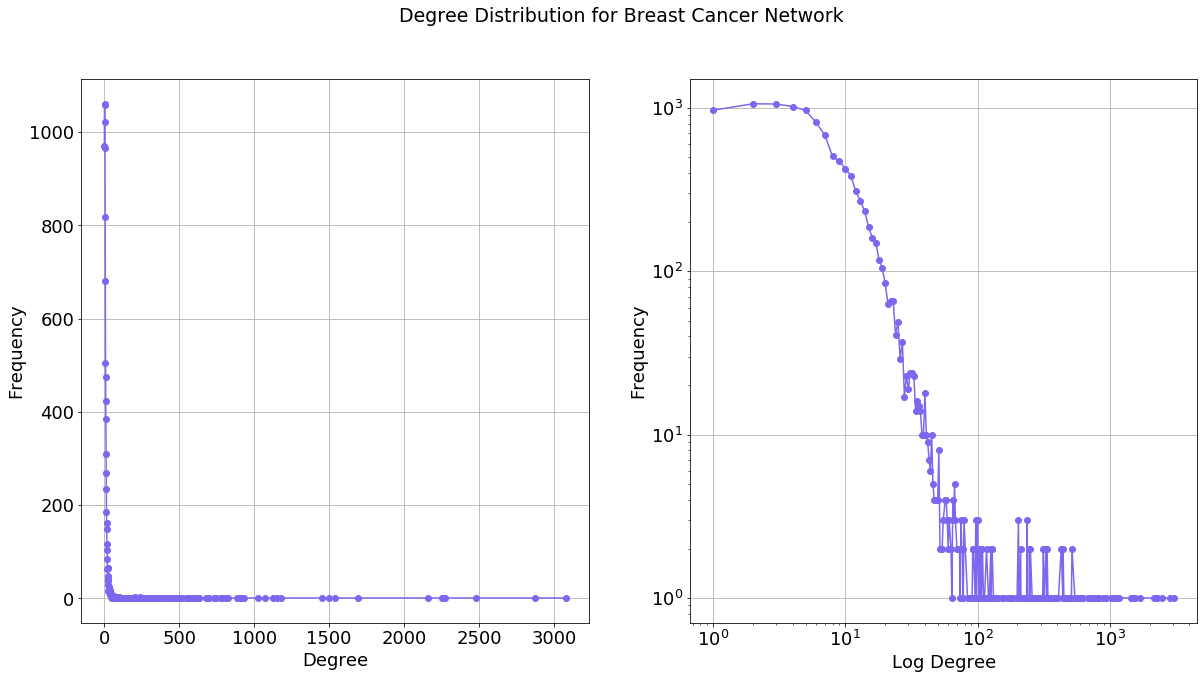

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10)) 
fig.suptitle('Degree Distribution for Breast Cancer Network', fontsize=19)

axes[0].grid(True)
axes[0].plot(degrees_B, frequency_B, 'ro-', color='#7B68EE')
axes[0].set_xlabel("Degree", fontsize=18)
axes[0].set_ylabel("Frequency", fontsize=18)
axes[0].tick_params(axis="x", labelsize=18)
axes[0].tick_params(axis="y", labelsize=18)

axes[1].grid(True)
axes[1].loglog(degrees_B, frequency_B,'ro-',color='#7B68EE')
axes[1].set_xlabel("Log Degree", fontsize=18)
axes[1].set_ylabel("Frequency", fontsize=18)
axes[1].tick_params(axis="x", labelsize=18)
axes[1].tick_params(axis="y", labelsize=18)
plt.savefig('Distt_B')

plt.show()

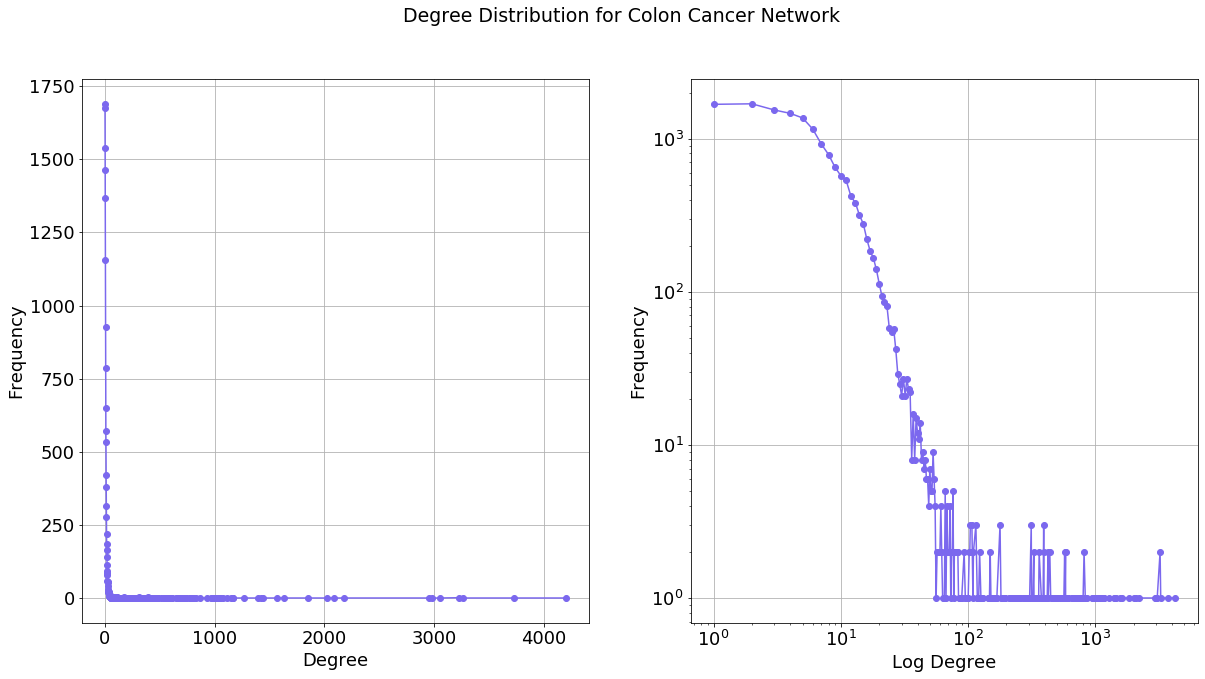

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10)) 
fig.suptitle('Degree Distribution for Colon Cancer Network', fontsize=19)

axes[0].grid(True)
axes[0].plot(degrees_C, frequency_C, 'ro-', color='#7B68EE')
axes[0].set_xlabel("Degree", fontsize=18)
axes[0].set_ylabel("Frequency", fontsize=18)
axes[0].tick_params(axis="x", labelsize=18)
axes[0].tick_params(axis="y", labelsize=18)

axes[1].grid(True)
axes[1].loglog(degrees_C, frequency_C,'ro-', color='#7B68EE')
axes[1].set_xlabel("Log Degree", fontsize=18)
axes[1].set_ylabel("Frequency", fontsize=18)
axes[1].tick_params(axis="x", labelsize=18)
axes[1].tick_params(axis="y", labelsize=18)
plt.savefig('Distt_C')

plt.show()

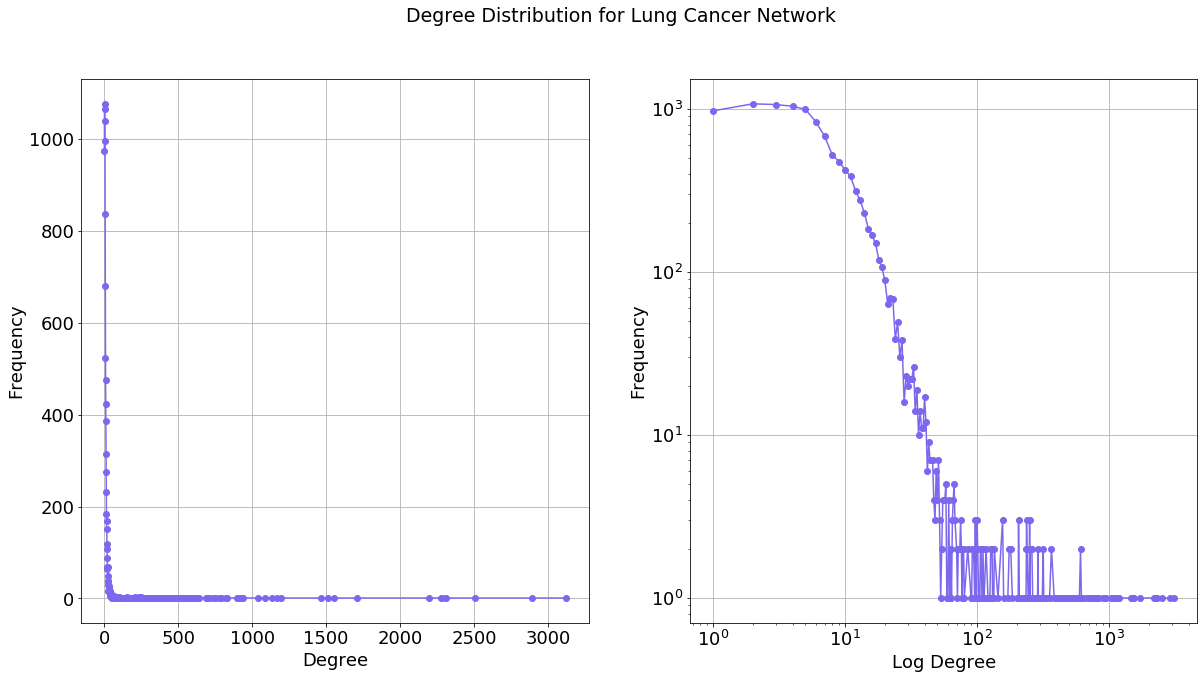

In [12]:
# Plot degree distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10)) 
fig.suptitle('Degree Distribution for Lung Cancer Network', fontsize=19)

axes[0].grid(True)
axes[0].plot(degrees_L, frequency_L, 'ro-', color='#7B68EE')
axes[0].set_xlabel("Degree", fontsize=18)
axes[0].set_ylabel("Frequency", fontsize=18)
axes[0].tick_params(axis="x", labelsize=18)
axes[0].tick_params(axis="y", labelsize=18)

axes[1].grid(True)
axes[1].loglog(degrees_L, frequency_L,'ro-',color='#7B68EE')
axes[1].set_xlabel("Log Degree", fontsize=18)
axes[1].set_ylabel("Frequency", fontsize=18)
axes[1].tick_params(axis="x", labelsize=18)
axes[1].tick_params(axis="y", labelsize=18)
plt.savefig('Distt_L')

plt.show()

In [13]:
k_B = sum(dict(nx.degree(Gconnected_B)).values())/float(len(Gconnected_B))
n_B = len(Gconnected_B)
k_C = sum(dict(nx.degree(Gconnected_C)).values())/float(len(Gconnected_C))
n_C = len(Gconnected_C)
k_L = sum(dict(nx.degree(Gconnected_L)).values())/float(len(Gconnected_L))
n_L = len(Gconnected_L)

# Calculate the average clustering coefficient assuming the network is random
print(k_B/n_B)
print(k_C/n_C)
print(k_L/n_L)

0.0014589007657320524
0.0009610088805675049
0.0014404819574017934


In [14]:
# Calculate the average shortest path assuming the network is random
ln_B = np.log(n_B)
lk_B =  np.log(k_B)
print(ln_B/lk_B)
ln_C = np.log(n_C)
lk_C =  np.log(k_C)
print(ln_C/lk_C)
ln_L = np.log(n_L)
lk_L =  np.log(k_L)
print(ln_L/lk_L)

3.3618662657165586
3.562156539693761
3.366939062611203


In [15]:
print(nx.average_shortest_path_length(Gconnected_B))

0.29827422764264305


In [16]:
print(nx.average_shortest_path_length(Gconnected_C))

0.24002342136406385


In [14]:
print(nx.average_shortest_path_length(Gconnected_L))

0.2967112710344883


In [18]:
# Clustering coefficient of all nodes
clust_coefficients_B = nx.clustering(Gconnected_B)
clust_coefficients_B

{'SHC3': 0.26052631578947366,
 'ABL1': 0.041578097100586686,
 'STAT5B': 0.04834335864313184,
 'CBLB': 0.15833333333333333,
 'CBLC': 0,
 'CD55': 0.42857142857142855,
 'CRK': 0.23214285714285715,
 'CRKL': 0.15384615384615385,
 'RAC3': 0.47619047619047616,
 'RB1': 0.06705605360862085,
 'SHC1': 0.4166666666666667,
 'SHC2': 0.45,
 'STAT5A': 0.014644909688013137,
 'CBL': 0.21428571428571427,
 'EPHA1': 0.047619047619047616,
 'EPHA2': 0.28888888888888886,
 'EPHA3': 0.2777777777777778,
 'EPHA4': 0.15,
 'EPHA5': 0,
 'EPHA7': 0.16666666666666666,
 'EPHB1': 0.13333333333333333,
 'EPHB2': 0.25555555555555554,
 'EPHB3': 0.18571428571428572,
 'EPHB4': 0,
 'EPHB6': 0.09523809523809523,
 'GRB2': 0.0625,
 'MYC': 0.0031045740116103413,
 'NTRK1': 0.22514619883040934,
 'NTRK2': 0.3333333333333333,
 'NTRK3': 0.14035087719298245,
 'RAC1': 0.23333333333333334,
 'RAC2': 0.26785714285714285,
 'APP': 0.24175824175824176,
 'APBB1': 0.0838095238095238,
 'TBL1Y': 0.5,
 'APC': 0.0857843137254902,
 'ARHGEF4': 0.33333

In [19]:
clust_coefficients_C = nx.clustering(Gconnected_C)
clust_coefficients_C

{'SHC3': 0.26052631578947366,
 'ABL1': 0.03704109989761591,
 'STAT5B': 0.04019243301261165,
 'CBLB': 0.14705882352941177,
 'CBLC': 0.08333333333333333,
 'CD55': 0.42857142857142855,
 'CRK': 0.23214285714285715,
 'CRKL': 0.15384615384615385,
 'RAC3': 0.375,
 'RB1': 0.0640059918681789,
 'SHC1': 0.4166666666666667,
 'SHC2': 0.4,
 'SHC4': 0.09523809523809523,
 'STAT5A': 0.010399413334007662,
 'CBL': 0.19166666666666668,
 'EPHA1': 0.047619047619047616,
 'EPHA2': 0.28888888888888886,
 'EPHA3': 0.2777777777777778,
 'EPHA4': 0.15,
 'EPHA5': 0,
 'EPHA6': 0.13636363636363635,
 'EPHA7': 0.16666666666666666,
 'EPHA8': 1.0,
 'EPHB1': 0.13333333333333333,
 'EPHB2': 0.25555555555555554,
 'EPHB3': 0.175,
 'EPHB4': 0,
 'EPHB6': 0.125,
 'GRB2': 0.049019607843137254,
 'MYC': 0.0022325889063471846,
 'NTRK1': 0.2236842105263158,
 'NTRK2': 0.3333333333333333,
 'NTRK3': 0.13157894736842105,
 'RAC1': 0.23333333333333334,
 'RAC2': 0.26785714285714285,
 'APP': 0.24285714285714285,
 'APBB1': 0.0838095238095238,


In [17]:
clust_coefficients_L = nx.clustering(Gconnected_L)
clust_coefficients_L

{'SHC3': 0.26052631578947366,
 'ABL1': 0.041578097100586686,
 'STAT5B': 0.04789103690685413,
 'CBLB': 0.15833333333333333,
 'CBLC': 0,
 'CD55': 0.42857142857142855,
 'CRK': 0.23214285714285715,
 'CRKL': 0.15384615384615385,
 'RAC3': 0.47619047619047616,
 'RB1': 0.06705605360862085,
 'SHC1': 0.4166666666666667,
 'SHC2': 0.45,
 'STAT5A': 0.01453343503686753,
 'CBL': 0.21428571428571427,
 'EPHA1': 0.047619047619047616,
 'EPHA2': 0.28888888888888886,
 'EPHA3': 0.2777777777777778,
 'EPHA4': 0.15,
 'EPHA5': 0,
 'EPHA7': 0.16666666666666666,
 'EPHB1': 0.13333333333333333,
 'EPHB2': 0.25555555555555554,
 'EPHB3': 0.18571428571428572,
 'EPHB4': 0,
 'EPHB6': 0.09523809523809523,
 'GRB2': 0.07142857142857142,
 'MYC': 0.0030691045233444407,
 'NTRK1': 0.22514619883040934,
 'NTRK2': 0.3333333333333333,
 'NTRK3': 0.14035087719298245,
 'RAC1': 0.23333333333333334,
 'RAC2': 0.26785714285714285,
 'APP': 0.24175824175824176,
 'APBB1': 0.0838095238095238,
 'TBL1Y': 0.5,
 'APC': 0.0857843137254902,
 'ARHGE

In [20]:
# Average clustering coefficient in Intended network
avg_clust_L = sum(clust_coefficients_L.values()) / len(clust_coefficients_L)
print(avg_clust_L)
avg_clust_B = sum(clust_coefficients_B.values()) / len(clust_coefficients_B)
print(avg_clust_B)
avg_clust_C = sum(clust_coefficients_C.values()) / len(clust_coefficients_C)
print(avg_clust_C)

0.22272499522184894
0.22165767259442673
0.21435947934525507


# Calculate centralities:

# 1. Lung Cancer Network (*)

# 1.1. Degree Centrality

In [14]:
deg_centrality_L = nx.degree_centrality(Gconnected_L)

degreeC_L = pd.DataFrame(list(deg_centrality_L.items()),
                       columns = ['Name','degree centrality']) 

print('Lung Cancer Network:')
print('Mean Degree Centrality:', degreeC_L['degree centrality'].mean())
print('Min Degree Centrality:', degreeC_L['degree centrality'].min())
print('Max Degree Centrality:', degreeC_L['degree centrality'].max())

idD_L = degreeC_L['degree centrality'].idxmax()
nameD_L = degreeC_L.Name[degreeC_L['degree centrality'].idxmax()]
print('Max Degree Centrality is for:', nameD_L, '   with id:', idD_L)

Lung Cancer Network:
Mean Degree Centrality: 0.0014406127438516656
Min Degree Centrality: 9.079353550027238e-05
Max Degree Centrality: 0.28318503722534955
Max Degree Centrality is for: MAX    with id: 1814


# 1.2. Closeness Centrality

In [22]:
close_centrality_L = nx.closeness_centrality(Gconnected_L) 

clsC_L = pd.DataFrame(list(close_centrality_L.items()),
                      columns = ['Name','closeness centrality']) 

print('Lung Cancer Network:')
print('Mean Closeness Centrality:', clsC_L['closeness centrality'].mean())
print('Min Closeness Centrality:', clsC_L['closeness centrality'].min())
print('Max Closeness Centrality:', clsC_L['closeness centrality'].max())

idC_L = clsC_L['closeness centrality'].idxmax()
nameC_L = clsC_L.Name[clsC_L['closeness centrality'].idxmax()]                  
print('Max Closeness Centrality is for:', nameC_L, '   with id:', idC_L)

Lung Cancer Network:
Mean Closeness Centrality: 0.029532300804078353
Min Closeness Centrality: 0.0
Max Closeness Centrality: 0.5399065163914369
Max Closeness Centrality is for: MYC    with id: 26


# 1.3. Betweenness Centrality

In [23]:
bet_centrality_L = nx.betweenness_centrality(Gconnected_L, normalized = True, endpoints = False) 

btC_L = pd.DataFrame(list(bet_centrality_L.items()),
                     columns = ['Name','betweenness centrality']) 

print('Lung Cancer Network:')
print('Mean Betweenness Centrality:', btC_L['betweenness centrality'].mean())
print('Min Betweenness Centrality:', btC_L['betweenness centrality'].min())
print('Max Betweenness Centrality:', btC_L['betweenness centrality'].max())

idB_L = btC_L['betweenness centrality'].idxmax()
nameB_L = btC_L.Name[btC_L['betweenness centrality'].idxmax()]                     
print('Max betweenness Centrality is for:', nameB_L, '   with id:', idB_L)

Lung Cancer Network:
Mean Betweenness Centrality: 1.8585093538655333e-05
Min Betweenness Centrality: 0.0
Max Betweenness Centrality: 0.009167781630967717
Max betweenness Centrality is for: MYC    with id: 26


# Save results (*):

In [24]:
dfC_L = pd.merge(degreeC_L, clsC_L, how='inner', on= 'Name')
pd.merge(dfC_L, btC_L, how='inner', on= 'Name').to_csv("./centralities_L.csv", sep=',',index=False)

# 2. Breast Cancer Network (**)

# 2.1. Degree Centrality

In [15]:
deg_centrality_B = nx.degree_centrality(Gconnected_B)

degreeC_B = pd.DataFrame(list(deg_centrality_B.items()),
                       columns = ['Name','degree centrality']) 

print('Breast Cancer Network:')
print('Mean Degree Centrality:', degreeC_B['degree centrality'].mean())
print('Min Degree Centrality:', degreeC_B['degree centrality'].min())
print('Max Degree Centrality:', degreeC_B['degree centrality'].max())

idD_B = degreeC_B['degree centrality'].idxmax()
nameD_B = degreeC_B.Name[degreeC_B['degree centrality'].idxmax()]
print('Max Degree Centrality is for:', nameD_B, '   with id:', idD_B)

Breast Cancer Network:
Mean Degree Centrality: 0.001459034843552825
Min Degree Centrality: 9.190331770976932e-05
Max Degree Centrality: 0.2827865085929602
Max Degree Centrality is for: MAX    with id: 1809


# 2.2. Closeness Centrality

In [26]:
close_centrality_B = nx.closeness_centrality(Gconnected_B) 

clsC_B = pd.DataFrame(list(close_centrality_B.items()),
                      columns = ['Name','closeness centrality']) 

print('Breast Cancer Network:')
print('Mean Closeness Centrality:', clsC_B['closeness centrality'].mean())
print('Min Closeness Centrality:', clsC_B['closeness centrality'].min())
print('Max Closeness Centrality:', clsC_B['closeness centrality'].max())

idC_B = clsC_B['closeness centrality'].idxmax()
nameC_B = clsC_B.Name[clsC_B['closeness centrality'].idxmax()]                  
print('Max Closeness Centrality is for:', nameC_B, '   with id:', idC_B)

Breast Cancer Network:
Mean Closeness Centrality: 0.029740627119695374
Min Closeness Centrality: 0.0
Max Closeness Centrality: 0.5401661364249587
Max Closeness Centrality is for: MYC    with id: 26


# 2.3. Betweenness Centrality

In [27]:
bet_centrality_B = nx.betweenness_centrality(Gconnected_B, normalized = True, endpoints = False) 

btC_B = pd.DataFrame(list(bet_centrality_B.items()),
                     columns = ['Name','betweenness centrality']) 

print('Breast Cancer Network:')
print('Mean Betweenness Centrality:', btC_B['betweenness centrality'].mean())
print('Min Betweenness Centrality:', btC_B['betweenness centrality'].min())
print('Max Betweenness Centrality:', btC_B['betweenness centrality'].max())

idB_B = btC_B['betweenness centrality'].idxmax()
nameB_B = btC_B.Name[btC_B['betweenness centrality'].idxmax()]                     
print('Max betweenness Centrality is for:', nameB_B, '   with id:', idB_B)

Breast Cancer Network:
Mean Betweenness Centrality: 1.890329367602391e-05
Min Betweenness Centrality: 0.0
Max Betweenness Centrality: 0.00928886358766841
Max betweenness Centrality is for: MYC    with id: 26


# Save results (**):

In [28]:
dfC_B = pd.merge(degreeC_B, clsC_B, how='inner', on= 'Name')
pd.merge(dfC_B, btC_B, how='inner', on= 'Name').to_csv("./centralities_B.csv", sep=',',index=False)

# 3. Colon Cancer Network (***)

# 3.1. Degree Centrality

In [16]:
deg_centrality_C = nx.degree_centrality(Gconnected_C)

degreeC_C = pd.DataFrame(list(deg_centrality_C.items()),
                       columns = ['Name','degree centrality']) 

print('Colon Cancer Network:')
print('Mean Degree Centrality:', degreeC_C['degree centrality'].mean())
print('Min Degree Centrality:', degreeC_C['degree centrality'].min())
print('Max Degree Centrality:', degreeC_C['degree centrality'].max())

idD_C = degreeC_C['degree centrality'].idxmax()
nameD_C = degreeC_C.Name[degreeC_C['degree centrality'].idxmax()]
print('Max Degree Centrality is for:', nameD_C, '   with id:', idD_C)

Colon Cancer Network:
Mean Degree Centrality: 0.0009610702359195703
Min Degree Centrality: 6.384472961757006e-05
Max Degree Centrality: 0.2681478643937943
Max Degree Centrality is for: MAX    with id: 2002


# 3.2. Closeness Centrality

In [30]:
close_centrality_C = nx.closeness_centrality(Gconnected_C) 

clsC_C = pd.DataFrame(list(close_centrality_C.items()),
                      columns = ['Name','closeness centrality']) 

print('Colon Cancer Network:')
print('Mean Closeness Centrality:', clsC_C['closeness centrality'].mean())
print('Min Closeness Centrality:', clsC_C['closeness centrality'].min())
print('Max Closeness Centrality:', clsC_C['closeness centrality'].max())

idC_C = clsC_C['closeness centrality'].idxmax()
nameC_C = clsC_C.Name[clsC_C['closeness centrality'].idxmax()]                  
print('Max Closeness Centrality is for:', nameC_C, '   with id:', idC_C)

Colon Cancer Network:
Mean Closeness Centrality: 0.022793459400261423
Min Closeness Centrality: 0.0
Max Closeness Centrality: 0.5293445881760568
Max Closeness Centrality is for: SP1    with id: 474


# 3.3. Betweenness Centrality

In [31]:
bet_centrality_C = nx.betweenness_centrality(Gconnected_C, normalized = True, endpoints = False) 

btC_C = pd.DataFrame(list(bet_centrality_C.items()),
                     columns = ['Name','betweenness centrality']) 

print('Colon Cancer Network:')
print('Mean Betweenness Centrality:', btC_C['betweenness centrality'].mean())
print('Min Betweenness Centrality:', btC_C['betweenness centrality'].min())
print('Max Betweenness Centrality:', btC_C['betweenness centrality'].max())

idB_C = btC_C['betweenness centrality'].idxmax()
nameB_C = btC_C.Name[btC_C['betweenness centrality'].idxmax()]                     
print('Max betweenness Centrality is for:', nameB_C, '   with id:', idB_C)

Colon Cancer Network:
Mean Betweenness Centrality: 1.0683014832950665e-05
Min Betweenness Centrality: 0.0
Max Betweenness Centrality: 0.006959848448425791
Max betweenness Centrality is for: SP1    with id: 474


# Save results (***):

In [32]:
dfC_C = pd.merge(degreeC_C, clsC_C, how='inner', on= 'Name')
pd.merge(dfC_C, btC_C, how='inner', on= 'Name').to_csv("./centralities_C.csv", sep=',',index=False)